Import necessary packages: Numpy, Pandas, matplotlib

In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

In [96]:
path_to_train = '/content/drive/My Drive/ML_Class_2020/KNN/zip.train'
path_to_test = '/content/drive/My Drive/ML_Class_2020/KNN/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

# We only want to classify two different digits. You can choose which digits you want to classify youself

X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1][:30]
X_train = np.vstack((X_train_0, X_train_1))

y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1][:30]
y_train = np.hstack((y_train_0, y_train_1))

X_test_0 = X_test[y_test == 0]
X_test_1 = X_test[y_test == 1][:12]
X_test = np.vstack((X_test_0, X_test_1))

y_test_0 = y_test[y_test == 0]
y_test_1 = y_test[y_test == 1][:12]
y_test = np.hstack((y_test_0, y_test_1))

X = X_train
y = y_train

# cross validation split:

# first shuffle data set
indices = np.random.choice(range(len(X_train)), len(X_train))
X = X[indices]
y = y[indices]

# Now split the data in 5 sets
split_size = round(len(X)/5)
split_X = [X[i*split_size:(i+1)*split_size] for i in range(5)]
split_y = [y[i*split_size:(i+1)*split_size] for i in range(5)]

# do a Train/Val split 9:1
split_size_val = round(len(split_X[0])/10)
split_X_val = [split_X[i][-split_size_val:] for i in range(5)]
split_y_val = [split_y[i][-split_size_val:] for i in range(5)]
split_X_train = [split_X[i][:9*split_size_val] for i in range(5)]
split_y_train = [split_y[i][:9*split_size_val] for i in range(5)]

In [97]:
def show_numbers(X):
    num_samples = 90
    
    indices = np.random.choice(range(len(X)), num_samples)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) 
        plt.imshow(img, cmap='gray')
        plt.axis('off')


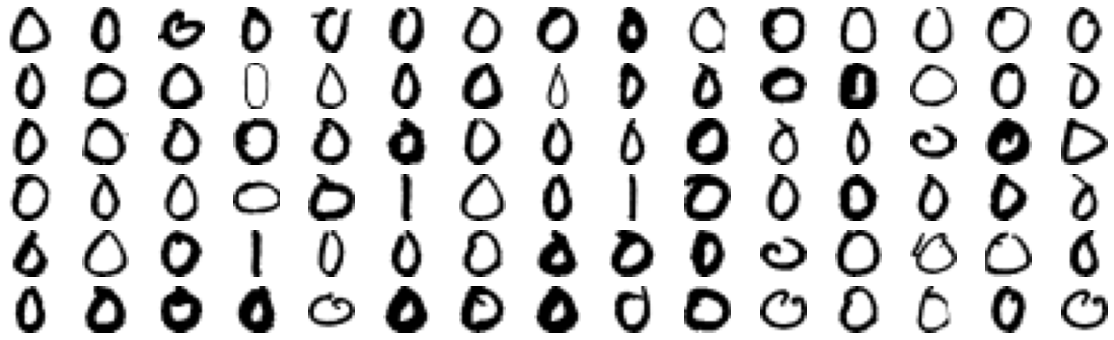

In [98]:
show_numbers(X_test)

Implement Logistic Regression, do gradient descent until training converges (find a good criterion for when that is the case yourself) and test the accuracy on your test data.

In [99]:
# Logistic Regression
def sigmoid(X):
  return 1/(1 + np.exp(-X))
  
def sigmoid_prime(X):
  return np.exp(-X)/(1+np.exp(-X))**2

def CE(X,Y):
  return -Y*np.log(X) - (1 - Y)*np.log(1 - X)

def CE_prime(X,Y):
  return (1 - Y)/(1 - X) - Y/X

def MSE(X,Y):
  return 


class LogisticRegression():
  def __init__(self, init_size):
    # initialize weight, bias and learning rate
    self.w = np.random.randn(init_size)
    self.b = np.random.randn(1)

    # tune hyperparameters while doing cross-validation
    self.lr = 0.05
    self.threshold = 0.9

  
  def forward(self, X):
    # z = X^T w + b
    linear_out = np.sum(X*self.w, axis=1) + self.b*np.ones(X.shape[0])
    activation = sigmoid(linear_out)
    return activation, linear_out, X

  def loss(self, activation, target):
    return CE(activation, target)

  def gradientDescent(self, activation, linear_out, X, Y):
    backward = CE_prime(activation, Y)*sigmoid_prime(linear_out)
    broadcasted_backward = np.repeat(np.expand_dims(backward, axis=1), X.shape[1], axis = 1)
    weight_gradient = np.mean(broadcasted_backward*X, axis=0)
    bias_gradient = np.mean(backward*np.ones(X.shape[0]), axis=0)

    # apply gradient descent
    self.w = self.w - self.lr*weight_gradient
    self.b = self.b - self.lr*bias_gradient

  def get_label(self, activation):
    return np.byte(activation >= self.threshold)


Loss for 1. train set


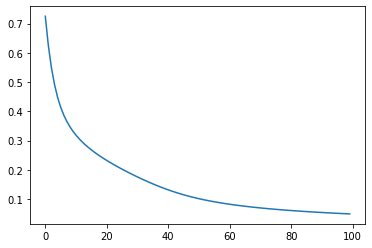

Loss for 2. train set


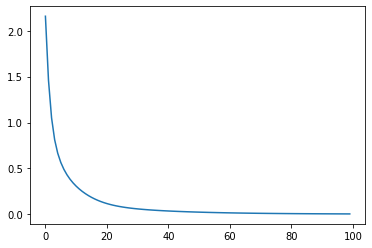

Loss for 3. train set


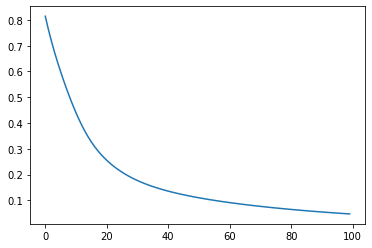

Loss for 4. train set


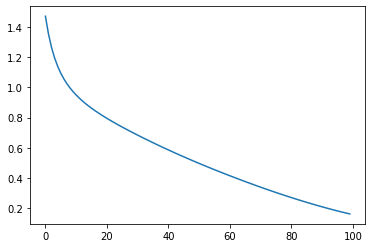

Loss for 5. train set


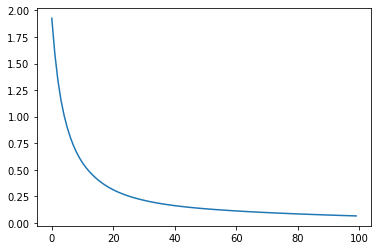

In [100]:
models = []
for i in range(5):
  models.append(LogisticRegression(split_X_train[i].shape[1]))
  episodes = 100
  losses = []
  for episode in range(episodes):
    output = models[i].forward(split_X_train[i])
    activation = output[0]
    avg_loss = np.mean(models[i].loss(activation, split_y_train[i]), axis=0)
    losses.append(avg_loss)

    # gradient descent
    models[i].gradientDescent(*output, split_y_train[i])

  print('Loss for {}. train set'.format(i+1))
  plt.plot(losses)
  plt.show()

Cross-Val Plot


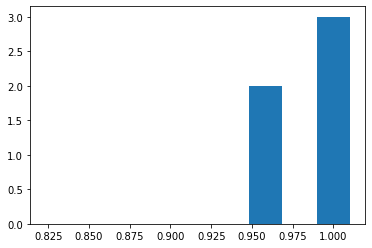

Mean: 0.9833333333333334
Std: 0.020412414523193135
This model has low std and high mean when it comes to accuracy
Notice that our data set is way too small for proper Cross-Validation
so due to small validation set sizes our results for CV will have a lot of variance (not in the model perfomance but over multiple CVs


In [133]:
accuracies = []
for i in range(5):
  output_val = models[i].forward(split_X_val[i])
  accuracy = np.mean(models[i].get_label(output_val[0]) == split_y_val[i])
  accuracies.append(accuracy)
plot = [np.sum(np.isclose(accuracies,(split_X_val[0].shape[0]-i)/split_X_val[0].shape[0])) for i in range(5)]
plt.bar([(split_X_val[0].shape[0]-i)/split_X_val[0].shape[0] for i in range(5)]
         ,plot, width =0.02)
print('Cross-Val Plot')
plt.show()
print('Mean: {}'.format(np.mean(accuracies)))
print('Std: {}'.format(np.std(accuracies)))

print('This model has low std and high mean when it comes to accuracy')
print('Notice that our data set is way too small for proper Cross-Validation')
print('so due to small validation set sizes our results for CV will have a lot of variance (not in the model perfomance but over multiple CVs)')

In [141]:
# Now evaluate on your test set:
accuracies = []
outputs = []
for i in range(5):
  outputs.append(models[i].forward(X_test))
  accuracy = np.mean(models[i].get_label(outputs[i][0]) == y_test)
  accuracies.append(accuracy)

print(accuracies)
best_model = models[np.argmax(accuracies)]
output = outputs[np.argmax(accuracies)]

# True Positives (TP)
TP = np.sum(np.logical_and(models[i].get_label(outputs[i][0]) == 1, y_test == 1))
# False Positives (FP)
FP = np.sum(np.logical_and(models[i].get_label(outputs[i][0]) == 1, y_test == 0))
# True Negatives (TN)
TN = np.sum(np.logical_and(models[i].get_label(outputs[i][0]) == 0, y_test == 0))
# False Negatives (FN)
FN = np.sum(np.logical_and(models[i].get_label(outputs[i][0]) == 0, y_test == 1))

confusion_matrix = np.array([[TP,FP],[FN, TN]])
print(confusion_matrix)

[0.9703504043126685, 0.9784366576819407, 0.9838274932614556, 0.9595687331536388, 0.9568733153638814]
[[  8  12]
 [  4 347]]


In [155]:
# For question b) to work lets assume our baseline predicts one positive sample correctly


precision = TP/(TP+FP)
print('precision = ', precision)
precision_base = 1/(1+(np.sum(y_test == 1)-1))
print('precision baseline = ', precision_base)
recall = TP/(TP+FN)
print('recall = ', recall)
recall_base = 1/(1+0)
print('recall baseline = ', recall_base)
F1 = 2/(recall**(-1)+precision**(-1))
print('F1 = ', F1)
F1_base = 2/(recall_base**(-1)+precision_base**(-1))
print('F1 baseline= ', F1_base)

accuracy_base = (np.sum(y_test == 0)+1)/len(y_test)
print('accuracy baseline = ', accuracy_base)
print('Although baseline accuracy is comparable to the trained model, the F1 score reflects how much worse it actually is')
print('Note that our model F1 score is also pretty bad')

precision =  0.4
precision baseline =  0.08333333333333333
recall =  0.6666666666666666
recall baseline =  1.0
F1 =  0.5
F1 baseline=  0.15384615384615385
accuracy baseline =  0.9703504043126685
Although baseline accuracy is comparable to the trained model, the F1 score reflects how much worse it actually is
Note that our model F1 score is also pretty bad


In [159]:
print('Probability of positive if test is positive:')
print(np.mean(y_test[best_model.get_label(best_model.forward(X_test)[0]) == 1] == 1))
print('Not really convincing. 20% of people tested positive would have to stay at home for no reason')

Probability of positive if test is positive:
0.8
Not really convincing. 20% of people tested positive would have to stay at home for no reason
